In [58]:
import os
from dotenv import load_dotenv
load_dotenv()


True

In [59]:
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")



In [60]:
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY
os.environ['LANGCHAIN_API_KEY']=LANGCHAIN_API_KEY

In [61]:
os.environ['LANGCHAIN_TRACING_V2']="true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

### creating simple tool using  wikipedia

In [62]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wiki_wrapper = WikipediaAPIWrapper()

tool  = WikipediaQueryRun(api_wrapper=wiki_wrapper)

In [63]:
tool.run("python")

/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/langvenv/lib/python3.12/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/langvenv/lib/python3.12/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


'Page: Python (programming language)\nSummary: Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.\nPython is dynamically type-checked and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.\nGuido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language and first released it in 1991 as Python 0.9.0. Python 2.0 was released in 2000. Python 3.0, released in 2008, was a major revision not completely backward-compatible with earlier versions. Python 2.7.18, released in 2020, was the last release of Python 2.\nPython consistently ranks as one of the most popular programming languages, and has gained widespread use in the machine learning community.\

In [64]:
print(tool.description)

A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.


In [65]:
tool.args

{'query': {'description': 'query to look up on wikipedia',
  'title': 'Query',
  'type': 'string'}}

In [66]:
tool.return_direct

False

In [67]:
print(tool.run("what is langchain"))

Page: Retrieval-augmented generation
Summary: Retrieval-Augmented Generation (RAG) is a technique that grants generative artificial intelligence models information retrieval capabilities. It modifies interactions with a large language model (LLM) so that the model responds to user queries with reference to a specified set of documents, using this information to augment information drawn from its own vast, static training data. This allows LLMs to use domain-specific and/or updated information.  
Use cases include providing chatbot access to internal company data or giving factual information only from an authoritative source.



Page: Prompt injection
Summary: Prompt injection is a family of related computer security exploits carried out by getting a machine learning model which was trained to follow human-given instructions (such as an LLM) to follow instructions provided by a malicious user. This stands in contrast to the intended operation of instruction-following systems, wherein t

In [68]:
from langchain_community.tools import YouTubeSearchTool
# pip install youtube_search

youtube_tool = YouTubeSearchTool()
youtube_tool.name


'youtube_search'

In [69]:
youtube_tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [70]:
youtube_tool.run("campusx")

"['https://www.youtube.com/watch?v=f9Aje_cN_CY&pp=ygUHY2FtcHVzeA%3D%3D', 'https://www.youtube.com/watch?v=DDfLc5AHoJI&pp=ygUHY2FtcHVzeA%3D%3D']"

In [71]:
from langchain_community.tools import TavilySearchResults

tavily_search_tool = TavilySearchResults()
tavily_search_tool.run("how are you")

[{'url': 'https://www.fluentu.com/blog/english/how-are-you-esl/',
  'content': 'Say “hello” to as many people as you can and see how they answer your “How are you?”\nOnce you’ve mastered this question, you might be so happy that you answer\n“perfect”\nto the next person who asks how you are!\nDownload:\n This can be paired with “same old” like this:\n“How are you doing?”\n“Oh, you know… same old”\nI’ve been better\nWhen there is something wrong, you can use “I’ve been better” as your first response.\n The difference between “How are you?” and “How are you doing?”\nThese phrases are very similar, but “how are you?” is slightly more formal, and may be used more commonly when someone is specifically asking about your health or wellbeing.\n Let’s look at some formal (more polite) answers to “How are you?”\nYou will use these answers when you’re talking to\nacquaintances\nand\nstrangers\n. This will lead your friend or relative to ask you\n“What’s wrong?”\nor something similar.\nCould be wo

In [72]:
tavily_search_tool.invoke("how are you")

[{'url': 'https://www.fluentu.com/blog/english/how-are-you-esl/',
  'content': 'Say “hello” to as many people as you can and see how they answer your “How are you?”\nOnce you’ve mastered this question, you might be so happy that you answer\n“perfect”\nto the next person who asks how you are!\nDownload:\n This can be paired with “same old” like this:\n“How are you doing?”\n“Oh, you know… same old”\nI’ve been better\nWhen there is something wrong, you can use “I’ve been better” as your first response.\n The difference between “How are you?” and “How are you doing?”\nThese phrases are very similar, but “how are you?” is slightly more formal, and may be used more commonly when someone is specifically asking about your health or wellbeing.\n Let’s look at some formal (more polite) answers to “How are you?”\nYou will use these answers when you’re talking to\nacquaintances\nand\nstrangers\n. This will lead your friend or relative to ask you\n“What’s wrong?”\nor something similar.\nCould be wo

In [73]:
# creating custum tool 
from langchain_community.tools import tool


@tool
def get_summation():
    """this tool  is used for mulitply two numbers

    Args:
        a (int): _description_
        b (int): _description_
    """
    a = input("Enter the value of A")
    b = input("Enter the value of B")
    return a+b

get_summation.invoke("add two number")

'1212'

In [74]:
from langchain_community.tools import tool

@tool
def get_summation(dict = None) -> int:
    """
    This tool prompts the user to enter two numbers and returns their sum.

    Args:
        input (dict, optional): Not used but required for compatibility.

    Returns:
        int: The sum of the two numbers entered by the user.
    """
    try:
        # Prompt the user for inputs
        a = int(input("Enter the value of A: "))
        b = int(input("Enter the value of B: "))
        return a + b
    except ValueError:
        return "Invalid input. Please enter valid integers."

# Example usage
result = get_summation.invoke({})
print("The result is:", result)


/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/langvenv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "dict" in "GetSummation" shadows an attribute in parent "ValidatedFunction.create_model.<locals>.DecoratorBaseModel"
  warnings.warn(
/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/LangGraph/langvenv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "dict" in "get_summation" shadows an attribute in parent "BaseModel"
  warnings.warn(


The result is: 24


# What is Agent
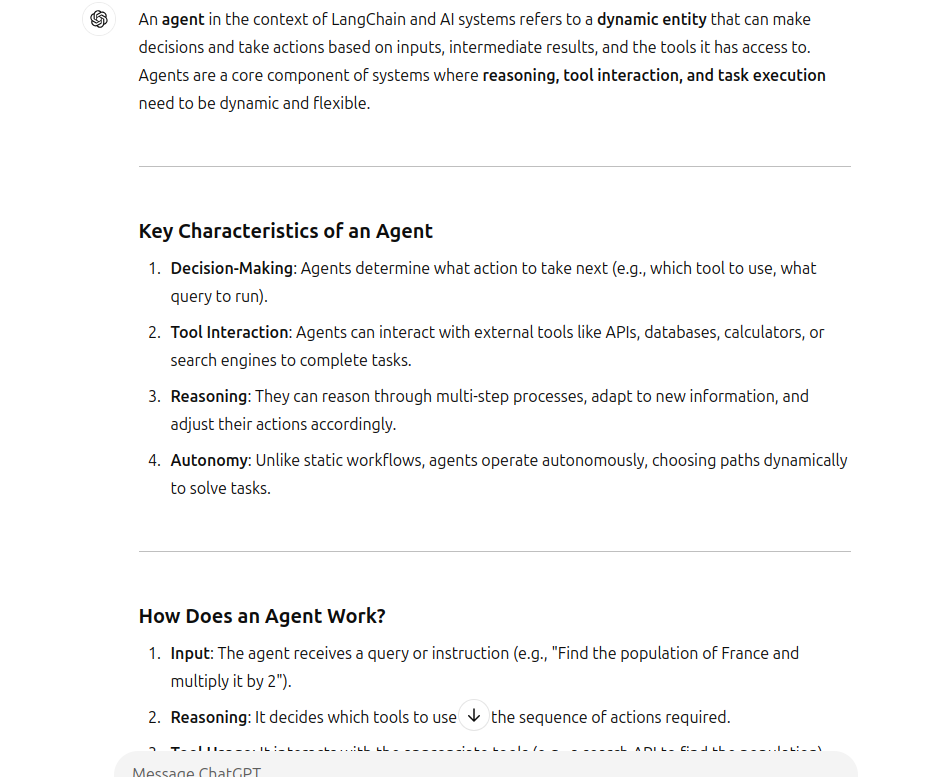

In [77]:
from langchain_google_genai  import GoogleGenerativeAI,\
GoogleGenerativeAIEmbeddings

from langchain_google_genai import ChatGoogleGenerativeAI


llm = ChatGoogleGenerativeAI(model='gemini-1.0-pro')

In [78]:
llm.invoke("Generate simple nature image")

AIMessage(content='```\n        .     .  .      +     .      .          .\n  .       .      .     #       .      .          .\n        .  #     ###    #      .      .   ####\n .     ####   ########   ##     ##    ##    ##\n  .  ####   ##  ##  ##   #     #  #    #     #\n  .  ##  ##           ##    #    #    #\n      ##    .      .   ##    ##     ##   ####\n       ######  ####  ###    ######     ##  ##\n        ###    ##  ##   ##     ###       # ##\n         ##    ####    ##     ##        ###\n        . ##   ##  ##   ##     ##     ####\n            ##   ##    ##    .  ##   ##  ##\n            ###   ###  . ##    ##   ##    ##\n             ##   ##   ###   ####   ##     ##\n             #    ##    ###   ####   ##   ###\n            .     ##     ##  .####     #####\n        .     .      .     ####        ####\n           .     .  .   .     ####     #####\n```', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 's

In [81]:
from langchain_huggingface import HuggingFaceEmbeddings
huggingface_embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [82]:
from langchain_groq import ChatGroq


llm  =ChatGroq(model="Gemma2-9b-It")# it is google gema familiy model

In [87]:
llm.run("What is Gemma2-9b-It")

AttributeError: 'ChatGroq' object has no attribute 'run'

In [88]:
llm.invoke("What is Gemma2-9b-It")


AIMessage(content="Gemma2-9B-IT is an open-weights AI language model developed by the Gemma team. Here's a breakdown:\n\n* **Gemma:** This refers to the family of open-weights language models created by the Gemma team.\n* **2:** This indicates the second generation of Gemma models, signifying improvements over the original Gemma models.\n* **9B:**  This stands for 9 billion parameters.  Parameters are the values that a language model learns during its training. A higher number of parameters generally means a more complex and potentially capable model.\n* **IT:** This likely refers to the language the model is primarily trained on, which is Italian.\n\n\n**Key Features:**\n\n* **Open-Weights:** The model's weights are publicly accessible, allowing anyone to study, modify, or build upon it. This promotes transparency and collaboration in the AI community.\n* **Italian Focus:** Gemma2-9B-IT is specifically trained on Italian language data, making it well-suited for tasks involving underst

# This Agent class from the first version of LangChain

In [98]:
from langchain.agents import AgentType
from langchain.agents import load_tools
from langchain.agents import initialize_agent


tool = load_tools(['wikipedia'],llm=llm)  # this call is depreciated from new insted of that we have seperate wrapper for this

agent = initialize_agent(tools=tool,llm=llm,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)


In [100]:
agent.run("What is current GDP of India")

/tmp/ipykernel_38777/2435368785.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  agent.run("What is current GDP of India")




> Entering new AgentExecutor chain...
Thought: I need to look up India's current GDP. 
Action: wikipedia
Action Input: GDP of India
Observation: Page: Economy of India
Summary: The economy of India is a developing mixed economy with a notable public sector in strategic sectors. It is the world's fifth-largest economy by nominal GDP and the third-largest by purchasing power parity (PPP); on a per capita income basis, India ranked 141th by GDP (nominal) and 125th by GDP (PPP). From independence in 1947 until 1991, successive governments followed the Soviet model and promoted protectionist economic policies, with extensive Sovietization, state intervention, demand-side economics, natural resources, bureaucrat-driven enterprises and economic regulation. This is characterised as dirigism, in the form of the Licence Raj. The end of the Cold War and an acute balance of payments crisis in 1991 led to the adoption of a broad economic liberalisation in India and indicative planning. India has 

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `Thought: I need to look up India's current GDP.


That seems to be 6% of GDP and is one of the world's fourth-largest consumer market. Aside private consumption, India's GDP is also fueled by government spending, investments, and exports. In recent years, the foreign direct investment (FDI) in India was $82 billion. The leading sectors for FDI inflows were the Finance, Banking, Insurance and R&D. India has free trade agreements with several nations and 




`
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

In [ ]:
from lang